# FindingFive results analysis
Note: session results can only be downloaded once the session is finished. Several sessions were created for several days; therefore results are in different files.

In [2]:
import numpy as np
import pandas as pd
import os
import difflib
import re

**Participant data from Calendly** - TODO: needs update because the participants list always changes

In [3]:
ff5_folder = "../data/ff5"
if os.path.exists(f"{ff5_folder}/participants.csv"):
    participants_path = f"{ff5_folder}/participants.csv"
    rewrite_participants = False
else:
    participants_path = f"{ff5_folder}/events-export.csv"
    rewrite_participants = True
part = pd.read_csv(participants_path)
print(f'Reading participants: {part.shape[0]} participants.')

Reading participants: 58 participants.


In [41]:
def parse_name(s:str, email:str):
    s = s.strip() # removing trailing space
    ss = s.split()
    email = re.sub(r'[0-9]+', '', email.split('@')[0]) # removing digits
    semail = email.split('.')

    if len(ss) == 2:
        # attempting finding correct ordering
        if (ss[0] == ss[0].upper()):
            return ss[1].capitalize(), ss[0].capitalize()
        elif ss[1] == ss[1].upper():
            return ss[0].capitalize(), ss[1].capitalize()
        m = difflib.get_close_matches(ss[0], semail, n=1)
        if (len(email) == 2) and len(m) >=1:
            # email usually is firstname lastname
            s_0_position = semail.index(m[0])
            return ss[s_0_position].capitalize(), ss[1-s_0_position].capitalize()
        # failing: returning as firstname lastname
        return ss[0].capitalize(), ss[1].capitalize()
    
    # otherwise: attempting to find correct name from email
    if ss[0].lower() in email:
        return ss[0].capitalize(), email.replace(ss[0].lower(),'').replace('.','').capitalize()
    elif len(email.split('.')) == 2:
        email = email.split('.')
        return email[0].capitalize(), email[1].capitalize()
    # failing
    return s, ''

In [42]:
if rewrite_participants:
    part = part[~part['Canceled']]
    part = part[['Invitee Name', 'Invitee Email', 'Text Reminder Number', 'Start Date & Time']].sort_values('Start Date & Time')
    # ideal header: idx,participant_lastname,participant_firstname,email,session_idx,session_date
    part.columns = ['participant_name', 'email', 'phonenumber','session_date']
    # reorder names (will need checking)
    t = part.apply(lambda x: parse_name(x.participant_name, x.email), axis=1)
    part['participant_firstname'] = t.apply(lambda x: x[0])
    part['participant_lastname'] = t.apply(lambda x: x[1]) 
    part['participant_name'] = part.participant_name.apply(lambda x: x.strip())
    # add session identifiers
    #part['session_idx'] = None
    #part['participant_role'] = None
    part['idx'] = part.apply(lambda x: None if x.participant_lastname == '' else f'{x.participant_firstname[0]}{x.participant_lastname[0]}', axis=1)
    # write participants file
    part = part[['idx', 'participant_name', 'participant_firstname', 'participant_lastname', 'email', 'phonenumber', \
            'session_date', 'session_idx', 'participant_role']]
    part.to_csv(participants_path, index=False)

sessions_pupdate = (part.session_idx.isna().sum() == part.shape[0])

In [ ]:
updateonly_participants = False
if updateonly_participants:
    part['idx'] = part.apply(lambda x: None if x.participant_lastname == '' else f'{x.participant_firstname[0]}{x.participant_lastname[0]}', axis=1)
    part['participant_name'] = part.apply(lambda x: "{x.participant_firstname} {x.participant_lastname}")
    part.to_csv(participants_path, index=False)

In [78]:
part.head(3)

,idx,participant_name,participant_firstname,participant_lastname,email,phonenumber,session_date,session_idx,participant_role
0,LB,BOUILLOT Lola,Lola,Bouillot,lola.bouillot@gmail.com,NaN,2022-11-16 09:00,NaN,NaN
1,MC,Montenon camille,Camille,Montenon,camille.montenon1@laposte.net,NaN,2022-11-16 09:00,NaN,NaN
2,NB,Balmes,Noemie,Balmes,noemie.blms@gmail.com,'+33 6 25 55 68 34,2022-11-16 13:00,NaN,NaN


**Checking participants from folders**

In [287]:
vpart = pd.DataFrame([x.split('_') for x in os.listdir('../data/video') if '22' in x], columns=['session_date','session_id'])
vpart['p1'] = vpart['session_id'].apply(lambda x: (x[:2]))
vpart['p2'] = vpart['session_id'].apply(lambda x: (x[2:]))
#vpart
# pivoting the dataframe
upart = vpart.set_index(['session_date','session_id']).stack().reset_index().sort_values(['session_date','session_id']).reset_index(drop=True)
upart.columns = ['session_date','session_id', 'pX', 'part_id']
upart['participant_role'] = upart.pX.apply(lambda x: 'démineur (ordinateur)' if x == 'p1' else 'expert (manuel)')
upart

,session_date,session_id,pX,part_id,participant_role
0,221116,CGLS,p1,CG,démineur (ordinateur)
1,221116,CGLS,p2,LS,expert (manuel)
2,221117,TFGG,p1,TF,démineur (ordinateur)
3,221117,TFGG,p2,GG,expert (manuel)
4,221118,GDNF,p1,GD,démineur (ordinateur)
5,221118,GDNF,p2,NF,expert (manuel)
6,221118,VPET,p1,VP,démineur (ordinateur)
7,221118,VPET,p2,ET,expert (manuel)
8,221121,JPMC,p1,JP,démineur (ordinateur)
9,221121,JPMC,p2,MC,expert (manuel)


And reading from the excel cadrage file

In [285]:
tpart = pd.read_excel('../data/video/cadrage-video.xlsx', sheet_name='participants')
tpart.head()

,participant_id,participant_firstname,participant_lastname,email,session_date,phonenumber,ff5_date,session_id,pX,participant_role
0,CG,Clara,Grégoire,NaN,2022-11-16 09:00:00,NaN,221116.0,CGLS,p1,démineur (ordinateur)
1,LS,Lucie,Saury,luciesaury@icloud.com,2022-11-16 09:00:00,NaN,221116.0,CGLS,p2,expert (manuel)
2,TF,Fourrier,Tifenn,tifenn.fourrier@gmail.com,2022-11-17 09:00:00,NaN,221117.0,TFGG,p1,démineur (ordinateur)
3,GG,Gaelle,NaN,galaerza@gmail.com,2022-11-17 09:00:00,NaN,221117.0,TFGG,p2,expert (manuel)
4,GD,Giulia,Danielou,giulia.danielou@etu.univ-amu.fr,2022-11-18 16:00:00,NaN,221118.0,GDNF,p1,démineur (ordinateur)


In [206]:
def update_participants(tpart:pd.DataFrame, vpart:pd.DataFrame):
    # update general excel with data from the video file
    for idx, row in tpart.iterrows():
        if (str(row.participant_id) == 'nan') and (str(row.participant_lastname) != 'nan'):
            tpart.loc[idx, 'participant_id'] = f"{row.participant_firstname[0]}{row.participant_lastname[0]}".upper()
        elif (str(row.participant_id) == 'nan'):
            print(f'Skipping {row.participant_firstname} - no last name')
            continue # cannot deal with that one
        # lookup date and participant_id in video tabl
        date = row.session_date.strftime('%y%m%d')
        if str(row.session_id)=='nan':
            vlines = vpart[(vpart.session_date == date) & (vpart.part_id == row.participant_id)] 
            if vlines.shape[0] != 1:
                print(f'Skipping {row.participant_firstname} {row.participant_lastname} {date} - no data')
                continue
            vlines = vlines.iloc[0]
            tpart.loc[idx, 'session_id'] = vlines.session_id
            tpart.loc[idx, 'pX'] = vlines.pX
            tpart.loc[idx, 'participant_role'] = vlines.participant_role
    return tpart

In [288]:
%%capture
tpart = update_participants(tpart, upart)
tpart['participant_name'] = tpart.apply(lambda x: f"{x.participant_firstname} {x.participant_lastname}", axis=1)

In [289]:
tpart.head()

,participant_id,participant_firstname,participant_lastname,email,session_date,phonenumber,ff5_date,session_id,pX,participant_role,participant_name
0,CG,Clara,Grégoire,NaN,2022-11-16 09:00:00,NaN,221116.0,CGLS,p1,démineur (ordinateur),Clara Grégoire
1,LS,Lucie,Saury,luciesaury@icloud.com,2022-11-16 09:00:00,NaN,221116.0,CGLS,p2,expert (manuel),Lucie Saury
2,TF,Fourrier,Tifenn,tifenn.fourrier@gmail.com,2022-11-17 09:00:00,NaN,221117.0,TFGG,p1,démineur (ordinateur),Fourrier Tifenn
3,GG,Gaelle,NaN,galaerza@gmail.com,2022-11-17 09:00:00,NaN,221117.0,TFGG,p2,expert (manuel),Gaelle nan
4,GD,Giulia,Danielou,giulia.danielou@etu.univ-amu.fr,2022-11-18 16:00:00,NaN,221118.0,GDNF,p1,démineur (ordinateur),Giulia Danielou


**Reading participant data from Finding Five**
* results files motif: `BrainKT-{YYMMDD}-results.csv`
* other files: participants, pilot results

In [217]:
res = []
for file in os.listdir(ff5_folder):
    if 'results' in file and 'pilot' not in file:
        t = pd.read_csv(os.path.join(ff5_folder, file))
        t['session_date'] = file.split('-')[1]
        res.append(t)
res = pd.concat(res, axis=0).reset_index(drop=True)
print(f"Results - shape: {res.shape[0]}\t number of participants: {len(res.participant_id.unique())}")
res.head()

Results - shape: 2160	 number of participants: 54


,expt_id,group_id,network_error_repeat,participant_id,participation_duration,response_correct,response_mode,response_name,response_rt,response_target,response_type,response_value,session_id,session_start_time,stimuli_presented,trial_duration,trial_num,trial_template,session_date
0,634535ee30f231f5c20a2862,default,0,1d3fca54c1ab71bcb85dc696919e8e1850176f6456f662...,365.552757,NaN,keypress,GG1,25411,NaN,text-response,Héloïse Batton,637ddc4e67b407db9b9e9a77,2022-11-23 08:39:42+00:00,NaN,64905,1,G1,221123
1,634535ee30f231f5c20a2862,default,0,1d3fca54c1ab71bcb85dc696919e8e1850176f6456f662...,365.552757,NaN,keypress,GG2,6335,NaN,text-response,21,637ddc4e67b407db9b9e9a77,2022-11-23 08:39:42+00:00,NaN,64905,1,G1,221123
2,634535ee30f231f5c20a2862,default,0,1d3fca54c1ab71bcb85dc696919e8e1850176f6456f662...,365.552757,False,click,GG3,16181,[],choice-response,F,637ddc4e67b407db9b9e9a77,2022-11-23 08:39:42+00:00,NaN,64905,1,G1,221123
3,634535ee30f231f5c20a2862,default,0,1d3fca54c1ab71bcb85dc696919e8e1850176f6456f662...,365.552757,False,click,GG7,16415,[],choice-response,Droitier.e,637ddc4e67b407db9b9e9a77,2022-11-23 08:39:42+00:00,NaN,64905,1,G1,221123
4,634535ee30f231f5c20a2862,default,0,1d3fca54c1ab71bcb85dc696919e8e1850176f6456f662...,365.552757,False,keypress,GG4,44475,NaN,rating-response,1,637ddc4e67b407db9b9e9a77,2022-11-23 08:39:42+00:00,NaN,52829,2,G1,221123


In [5]:
res.columns

Index(['expt_id', 'group_id', 'network_error_repeat', 'participant_id',
       'participation_duration', 'response_correct', 'response_mode',
       'response_name', 'response_rt', 'response_target', 'response_type',
       'response_value', 'session_id', 'session_start_time',
       'stimuli_presented', 'trial_duration', 'trial_num', 'trial_template',
       'session_date'],
      dtype='object')

The goals are:
1. To extract the name and create a table of `names - patterns - session` for each participant (which will be checked align with the rest of the data)
2. To create a table associating patterns with responses - one line for each participant (also that can be obtained by pivoting the table)
3. To save in the directory where the rest of the data is.
4. To update the participant data with participant roles

Results directory will also contain questionnaires data (`responses.csv, stimuli.csv, procedure.json, trial-template.json`)

Note: 
* Identifying information: 'GG1' (name),'GG2' (age), 'GG3' (gender)
* Free responses: 'KE2' (KTaNE), 'DCQ2' (discussion), 'GE3' (attention during conversation)
* Task relevant information: 'GG4' (game experience), 'GG5' (ktane knowledge), 'GG6' (participant role)
* The rest of the answers are labelled

In [218]:
sorted(res.session_start_time.unique())

['2022-11-16 06:08:12+00:00',
 '2022-11-18 09:27:51+00:00',
 '2022-11-21 13:05:15+00:00',
 '2022-11-22 13:12:59+00:00',
 '2022-11-23 08:39:42+00:00',
 '2022-11-25 07:43:38+00:00',
 '2022-11-30 07:39:10+00:00',
 '2022-12-01 07:48:41+00:00',
 '2022-12-02 07:51:55+00:00',
 '2022-12-05 15:25:36+00:00',
 '2022-12-07 09:19:58+00:00']

In [219]:
id_questions = ['GG1','GG2','GG3','GG7']
session_questions = ['GG6']
detail_questions = ['KE2', 'DCQ2', 'GE3']

In [222]:
t = res[res.response_name == 'GG1'][['participant_id', 'response_value']]

**Creating table with identifying information**

In [223]:
id_data_path = f'{ff5_folder}/ff5-id-data.csv'

id_data = res[res.response_name.isin(id_questions+session_questions)][['participant_id','response_name','response_value']]
id_data = id_data.pivot(index='participant_id', columns='response_name').droplevel(0, axis=1)
#id_data = id_data.pivot_table(values='response_value', index='participant_id', columns='response_name', aggfunc=lambda x: list(x)[0])
id_data.columns = ['name','age','gender','participant_role','main_hand']
#id_data['name_pattern'] = id_data.name.apply(lambda x: ''.join([y[0] for y in x.capitalize().split()]))
# name
id_data.age = id_data.age.apply(lambda x: int(x.replace('ans','')))
id_data

,name,age,gender,participant_role,main_hand
participant_id,,,,,
02d10050b5e0e271aabfa3b1b819eed43936ca0415d4f8ff2d9d23e98c11fce1,Manon CHEINET,26,F,expert (manuel),Droitier.e
1b2d3103ed5ae86550c82edeb55743d3a44c4959b20a8305d5c997ba92bcf455,FAVAS,20,M,démineur (ordinateur),Droitier.e
1d3fca54c1ab71bcb85dc696919e8e1850176f6456f6628258675f0898cf26f3,Héloïse Batton,21,F,expert (manuel),Droitier.e
1e9d7bc9a60872a048ea68c4afea992b9837acb582d40fd3159a48079dd96b83,Lenfant,26,F,démineur (ordinateur),Droitier.e
2124999ef4256cfb5134423f84bc6f7febddb784eb1035db5fd34084b2c1f8f4,Batôt Louise,24,F,expert (manuel),Droitier.e
21bb0ef981776f69c44c4ad002a0c5a974838ac544da581fd496caaf9ecda1fa,Lauren Hartmann,24,F,expert (manuel),Droitier.e
2489f2d475b183783ce16946dd01e2479bdec818401c3fdfa5a8a490a1f47c01,Kudla,28,M,démineur (ordinateur),Droitier.e
268812f7ab4cec61339fd71bff3372c1476ce80c5fe76c734417ac4874d7e2e6,Pfeiffer Victor,25,M,démineur (ordinateur),Droitier.e
28d64490800e24053560a7109dbdbc056af42b22e114878b25e73d605b2dfde2,Marine,23,M,démineur (ordinateur),Droitier.e


In [224]:
id_data.gender.value_counts()

F    42
M    12
Name: gender, dtype: int64

The goal is to match the name to that of a participant in the participants table.

In [241]:
# from videos
part = tpart
part['participant_name'] = part['participant_name'].apply(lambda x: x.title())

In [226]:
# getting participant name - pattern matches
participants = part.set_index('participant_name')['participant_id'].to_dict()
# prepping for querying
id_data.reset_index(drop=False).to_csv(id_data_path, index=False)

In [277]:
def iterative_match(l1:list,l2:list) -> dict:
    """l1: list to match; l2: reference list
    Method: order l1 by longest items ; pop items from both lists when matched
    """
    def get_exact_match(s, l2):
        """If words can be found directly in reference list, and only one match"""
        words = re.findall(re.compile('\w+'), s)
        c = [sum([word in match for word in words]) for match in l2]
        if sum([x == max(c) for x in c]) == 1:
            return l2[np.argmax(c)]
        else:
            return None

    # not working well enough
    # matches = difflib.get_close_matches(s, participants, 5, cutoff=0.3)
    associations = {}
    for s in l1:
        r = get_exact_match(s, l2)
        if r is not None:
            associations[s] = r
            l2.pop(l2.index(r))
    # can only pop l1 once finished
    l1 = list(set(l1) - set(associations.keys()))
    #l1 = sorted(l1, key=lambda x: len(x), reverse=True)

    # check which is the closest for remaining names
    # create cross table - then get max on each row, sort rows, and take max
    d = {}
    for s in l1:
        d[s] = [difflib.SequenceMatcher(None, s, x).find_longest_match().size for x in l2]
    d = pd.DataFrame(d).T
    d.columns = l2
    d = d.idxmax(axis="columns").to_dict()
    return dict(associations, **d)

In [279]:
# querying - might need more than 1 exec
id_data = pd.read_csv(id_data_path, index_col=0)
id_data.name = id_data.name.apply(lambda x: x.title())
closest_match = iterative_match(id_data.name.to_list(), part['participant_name'].tolist())
id_data['name_pattern'] = id_data.name.apply(lambda x: closest_match[x])
#id_data['name_pattern'] = id_data['name_pattern'].apply(lambda x: None if len(x) == 0 else x[0]) # not difflib => no list

if id_data['name_pattern'].isna().sum() > 0:
    raise ValueError('Cannot match - Please check participants names in the table.')
else:
    #id_data['name_pattern'] = id_data['name_pattern'].apply(lambda x: participants[x])
    # issues with unicity
    pass

In [281]:
id_data.head()

,name,age,gender,participant_role,main_hand,name_pattern
participant_id,,,,,,
02d10050b5e0e271aabfa3b1b819eed43936ca0415d4f8ff2d9d23e98c11fce1,Manon Cheinet,26,F,expert (manuel),Droitier.e,Manon Cheinet
1b2d3103ed5ae86550c82edeb55743d3a44c4959b20a8305d5c997ba92bcf455,Favas,20,M,démineur (ordinateur),Droitier.e,Julien Favas
1d3fca54c1ab71bcb85dc696919e8e1850176f6456f6628258675f0898cf26f3,Héloïse Batton,21,F,expert (manuel),Droitier.e,Héloïse Batton
1e9d7bc9a60872a048ea68c4afea992b9837acb582d40fd3159a48079dd96b83,Lenfant,26,F,démineur (ordinateur),Droitier.e,Emma Lenfant
2124999ef4256cfb5134423f84bc6f7febddb784eb1035db5fd34084b2c1f8f4,Batôt Louise,24,F,expert (manuel),Droitier.e,Louise Batôt


Merge participant data with finding five:
<br>-- From the data viewer: cannot merge on `participant_id` as two participants might share it.

In [290]:
part = part.merge(id_data.reset_index(drop=False).rename(columns={'participant_id':'questionnaire_id'}), 
                how='left', left_on=['participant_name'], 
                right_on=['name_pattern'])
part.rename(columns={'participant_role_y':'participant_role'}, inplace=True)
part.drop(columns=['name', 'name_pattern', 'participant_role_x'], inplace=True)
part = part[['questionnaire_id', 'session_date', 'session_id', 'participant_id', 'pX',
                'participant_role', 'participant_name','participant_firstname','participant_lastname',
                'email', 'phonenumber', 'age','gender','main_hand']]
part.head()

,questionnaire_id,session_date,session_id,participant_id,pX,participant_role,participant_name,participant_firstname,participant_lastname,email,phonenumber,age,gender,main_hand
0,cbf9cf488b1f126a78802dc8668e8045370b1378640588...,2022-11-16 09:00:00,CGLS,CG,p1,démineur (ordinateur),Clara Grégoire,Clara,Grégoire,NaN,NaN,22.0,F,Droitier.e
1,9253462b65ddac5d13629e8000ebd6507dc23db77928ee...,2022-11-16 09:00:00,CGLS,LS,p2,expert (manuel),Lucie Saury,Lucie,Saury,luciesaury@icloud.com,NaN,22.0,F,Droitier.e
2,5f7da63210679af00b48d0eb7bce80f900668878b8b853...,2022-11-17 09:00:00,TFGG,TF,p1,démineur (ordinateur),Fourrier Tifenn,Fourrier,Tifenn,tifenn.fourrier@gmail.com,NaN,20.0,F,Gaucher.e
3,a038f02856d4750cd9ef07849a7782653a0e067fb9359d...,2022-11-17 09:00:00,TFGG,GG,p2,expert (manuel),Gaelle Nan,Gaelle,NaN,galaerza@gmail.com,NaN,20.0,F,Droitier.e
4,f6abfad72ac83095ab20fad35966b9d9f43fd90b49b67b...,2022-11-18 16:00:00,GDNF,GD,p1,démineur (ordinateur),Giulia Danielou,Giulia,Danielou,giulia.danielou@etu.univ-amu.fr,NaN,24.0,F,Droitier.e


If role is set but session id isn't, update

In [291]:
part.pX = part.participant_role.apply(lambda x: x if isinstance(x,float) else 'p1' if 'ordi' in x else 'p2')
# new folders
part[(part.session_id.isna()) & ~(part.pX.isna())].sort_values('pX').groupby('session_date').participant_id.agg(lambda x: ''.join(list(x)))

session_date
2022-11-30 09:00:00    TFLH
2022-11-30 11:30:00    ASCS
2022-11-30 14:00:00    PCEF
2022-11-30 16:30:00    AMLB
2022-12-01 09:00:00    LIVS
2022-12-01 11:30:00    MMLM
2022-12-02 09:00:00    ELLD
2022-12-05 16:30:00    KMJF
2022-12-06 14:00:00    MMER
2022-12-06 16:30:00    LKCR
2022-12-07 16:30:00    LBMC
Name: participant_id, dtype: object

Update / Cleanup files

In [292]:
# update participants file
part.to_csv(participants_path, index=False)
# remove id_data (temporary file)
os.remove(id_data_path)

**Creating table with text zones information and anonymizing**

In [293]:
text_data = res[res.response_name.isin(detail_questions)][['participant_id','response_name','response_value']]
text_zones = {'KE2': 'KTaNE', 'DCQ2':'Discussion', 'GE3': 'General_Attention'}
text_data.response_name.apply(lambda x: text_zones[x])
text_data.head(3)

,participant_id,response_name,response_value
26,1d3fca54c1ab71bcb85dc696919e8e1850176f6456f662...,KE2,Non pas spécialement de remarques
32,1d3fca54c1ab71bcb85dc696919e8e1850176f6456f662...,DCQ2,Pas de remarque spécifique à faire
39,1d3fca54c1ab71bcb85dc696919e8e1850176f6456f662...,GE3,NaN


In [294]:
text_data.to_csv(f'{ff5_folder}/q-expe-details.csv', index=False)

**Creating table with question information and anonymizing**

In [295]:
q_data = res[~res.response_name.isin(id_questions+detail_questions)][['participant_id','response_name','response_value']]
# still need participant role
#q_data = q_data.pivot(index='participant_id', columns='response_name').droplevel(0, axis=1)
questions = {
    'GG6': 'General|Game Role',
    'GG4': 'General|Gaming Activity', 
    'GG5': 'General|KTane Connaissance',
    'GT1': 'General Trust',
    'GE1': 'General Self Engagement',
    'GE2': 'General Partner Engagement',
    'DCQ1': 'Discussion CommunicationEfficiency', 
    'KCQ1': 'KTaNe CommunicationEfficiency', 
    'KE1': 'KTaNe TeamEfficiency'
}
def split_qr(x:str):
    topic = x.split('|')[0]
    x = x.replace(topic, questions[topic])
    # some question don't have | at first, but others still need name replacing
    topic = x.split('|')[0] 
    if len(topic.split()) > 1:
        topic = topic.split()
        subtopic = topic[-1]
        topic = ' '.join(topic[:-1])
    else:
        subtopic = topic
    question = x.split('|')[1]
    return topic, subtopic, question

q_data['response_name'] = q_data.response_name.apply(split_qr)
q_data['questionnaire_topic'] = q_data.response_name.apply(lambda x: x[0])
q_data['questionnaire_subtopic'] = q_data.response_name.apply(lambda x: x[1])
q_data['questionnaire_question'] = q_data.response_name.apply(lambda x: x[2])
q_data = q_data[['participant_id', 'questionnaire_topic','questionnaire_subtopic','questionnaire_question','response_value']]

In [296]:
q_data_p = q_data.pivot_table(values='response_value', index=['participant_id'], 
        columns=['questionnaire_topic','questionnaire_subtopic','questionnaire_question'], aggfunc=lambda x: list(x)[0])
q_data_p.head()    

questionnaire_topic                                             Discussion  \
questionnaire_subtopic                             CommunicationEfficiency   
questionnaire_question                                              claire   
participant_id                                                               
02d10050b5e0e271aabfa3b1b819eed43936ca0415d4f8f...                       3   
1b2d3103ed5ae86550c82edeb55743d3a44c4959b20a830...                       5   
1d3fca54c1ab71bcb85dc696919e8e1850176f6456f6628...                       4   
1e9d7bc9a60872a048ea68c4afea992b9837acb582d40fd...                       4   
2124999ef4256cfb5134423f84bc6f7febddb784eb1035d...                       5   

questionnaire_topic                                                           \
questionnaire_subtopic                                                         
questionnaire_question                             complete dans les temps ?   
participant_id                                                                 
02d10050b5e0e271aabfa3b1b819eed43936ca0415d4f8f...        3                4   
1b2d3103ed5ae86550c82edeb55743d3a44c4959b20a830...        5                4   
1d3fca54c1ab71bcb85dc696919e8e1850176f6456f6628...        4                4   
1e9d7bc9a60872a048ea68c4afea992b9837acb582d40fd...        5                5   
2124999ef4256cfb5134423f84bc6f7febddb784eb1035d...        5                3   

questionnaire_topic                                                 \
questionnaire_subtopic                                               
questionnaire_question                             efficace fluide   
participant_id                                                       
02d10050b5e0e271aabfa3b1b819eed43936ca0415d4f8f...        4      4   
1b2d3103ed5ae86550c82edeb55743d3a44c4959b20a830...        4      4   
1d3fca54c1ab71bcb85dc696919e8e1850176f6456f6628...        2      3   
1e9d7bc9a60872a048ea68c4afea992b9837acb582d40fd...        5      5   
2124999ef4256cfb5134423f84bc6f7febddb784eb1035d...        5      5   

questionnaire_topic                                               General  \
questionnaire_subtopic                                            General   
questionnaire_question                                          Game Role   
participant_id                                                              
02d10050b5e0e271aabfa3b1b819eed43936ca0415d4f8f...        expert (manuel)   
1b2d3103ed5ae86550c82edeb55743d3a44c4959b20a830...  démineur (ordinateur)   
1d3fca54c1ab71bcb85dc696919e8e1850176f6456f6628...        expert (manuel)   
1e9d7bc9a60872a048ea68c4afea992b9837acb582d40fd...  démineur (ordinateur)   
2124999ef4256cfb5134423f84bc6f7febddb784eb1035d...        expert (manuel)   

questionnaire_topic                                                 \
questionnaire_subtopic                                               
questionnaire_question                             Gaming Activity   
participant_id                                                       
02d10050b5e0e271aabfa3b1b819eed43936ca0415d4f8f...               2   
1b2d3103ed5ae86550c82edeb55743d3a44c4959b20a830...               4   
1d3fca54c1ab71bcb85dc696919e8e1850176f6456f6628...               1   
1e9d7bc9a60872a048ea68c4afea992b9837acb582d40fd...               1   
2124999ef4256cfb5134423f84bc6f7febddb784eb1035d...               2   

questionnaire_topic                                                    \
questionnaire_subtopic                                                  
questionnaire_question                             KTane Connaissance   
participant_id                                                          
02d10050b5e0e271aabfa3b1b819eed43936ca0415d4f8f...                  0   
1b2d3103ed5ae86550c82edeb55743d3a44c4959b20a830...                  1   
1d3fca54c1ab71bcb85dc696919e8e1850176f6456f6628...                  0   
1e9d7bc9a60872a048ea68c4afea992b9837acb582d40fd...                  0   
2124999ef4256cfb5134423f84bc6f7febdd

In [297]:
for col in q_data_p.columns:
    if col != ('General','General','Game Role'):
        q_data_p[col] = q_data_p[col].astype(int)

In [298]:
q_data_p.to_excel(f'{ff5_folder}/questionnaire.xlsx')

## Experimental results

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
bkt = pd.read_excel('../data/video/cadrage-video.xlsx', sheet_name='KTANE-notes')
bkt.drop(columns=['bomb_duration', 'maze', 'wires_1', 'wires_2', 'simon', 'passcode','keyboard_1', 'keyboard_2'], inplace=True)
bkt.dropna(axis=0, inplace=True)
print(bkt.shape)
bkt.head()

(27, 5)


,date,time,group,number_errors,number_cleared_modules
0,2022-11-16,09:00:00,CGLS,13,3.0
1,2022-11-17,09:00:00,TFGG,12,4.0
2,2022-11-18,13:00:00,VPET,15,6.0
3,2022-11-18,16:00:00,GDNF,70,3.0
4,2022-11-21,13:00:00,JPMC,1,7.0


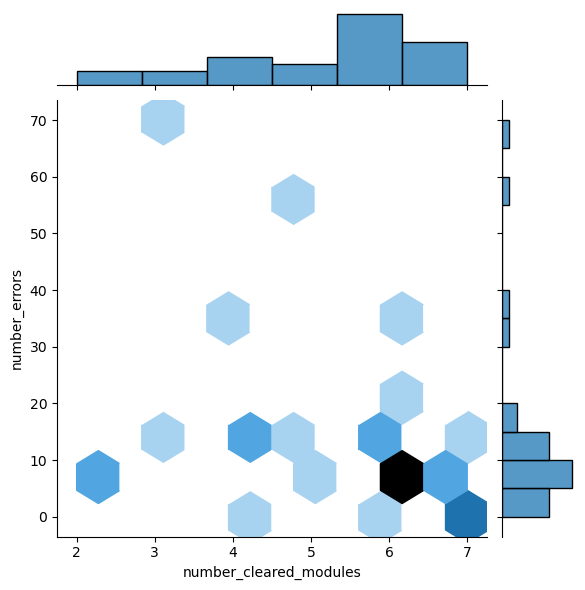

In [4]:
sns.jointplot(bkt, x='number_cleared_modules',y='number_errors', kind='hex')

(0.0, 7.0)

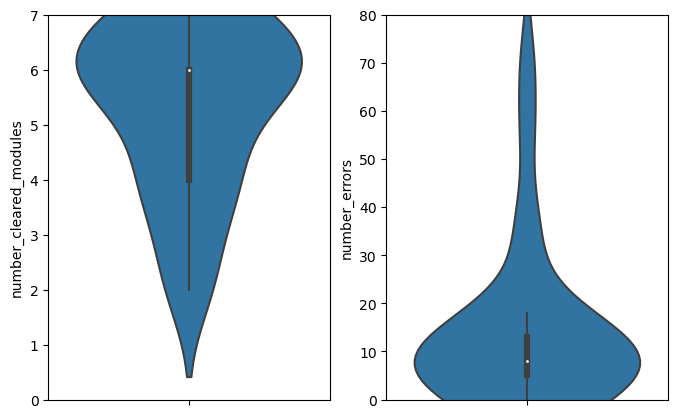

In [25]:
fig, ax = plt.subplots(1,2, figsize=(8,5))
sns.violinplot(data=bkt, y='number_cleared_modules', ax=ax[0])
sns.violinplot(data=bkt, y='number_errors', ax=ax[1])
ax[1].set_ylim(0,80)
ax[0].set_ylim(0,7)